In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

In [24]:
#create a network with city names as nodes
Flights=nx.DiGraph()
Flights.add_nodes_from(cities.index)

In [ ]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

In [26]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [27]:
#add edges to the network
Flights.add_edges_from(edgelist)

Q1. Find connected components, report their number and the sizes.

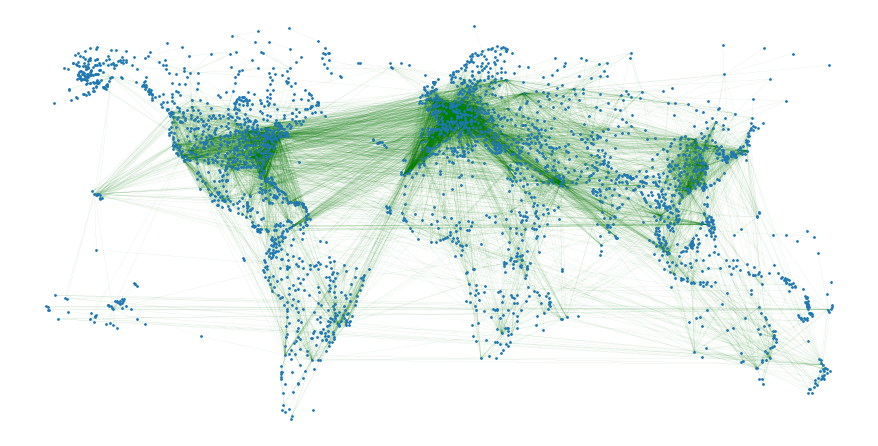

In [54]:
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,style='dotted',node_size=3,width=0.05,edge_color='green')

In [56]:
#find connected components
nx.number_weakly_connected_components(Flights)

4

In [57]:
#see there sizes; further we'll deal with the largest ()
CC=sorted(nx.weakly_connected_components(Flights), key=len, reverse=True)

In [58]:
#report their sizes
len(CC[0])

2981

In [59]:
len(CC[1])

3

In [60]:
len(CC[2])

2

In [61]:
len(CC[3])

2

Q2.In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with  alpha=0.85 ).

In [62]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    return ind

In [63]:
mc1=dict(nx.degree(Flights.subgraph(CC[0])))
ind1=topdict(mc1,10)

1|London : 621
2|Paris : 528
3|Moscow : 456
4|Frankfurt : 454
5|Atlanta : 416
6|Chicago : 396
7|Amsterdam : 391
8|Beijing : 368
9|Istanbul : 360
10|Dallas-fort Worth : 360


In [70]:
mc2 = nx.betweenness_centrality(Flights.subgraph(CC[0]))
ind2=topdict(mc2,10)

1|London : 0.09293077310458119
2|Paris : 0.0790171259830159
3|Anchorage : 0.0781614144753902
4|Moscow : 0.06073612222004971
5|Chicago : 0.05670374201525251
6|Frankfurt : 0.05355111483155896
7|Seattle : 0.05237690249519289
8|Dubai : 0.04690787134453887
9|Los Angeles : 0.04607394523655631
10|Toronto : 0.04582983719391736


In [71]:
mc3 = nx.closeness_centrality(Flights.subgraph(CC[0]))
ind3=topdict(mc3,10)

1|London : 0.418762886795032
2|Paris : 0.41172584066488155
3|Frankfurt : 0.41126510395690574
4|Amsterdam : 0.40308941982285706
5|New York : 0.3956047131576856
6|Los Angeles : 0.3917567259410952
7|Toronto : 0.3916001902221523
8|Dubai : 0.3884955375512579
9|Chicago : 0.3875226345311611
10|Newark : 0.3855408114592079


In [72]:
mc4 = nx.pagerank(Flights.subgraph(CC[0]),0.85)
ind4=topdict(mc4,10)

1|London : 0.006819157626636692
2|Moscow : 0.006459400878011965
3|Paris : 0.006401329472831889
4|Atlanta : 0.005135955255080829
5|Chicago : 0.0047885434830701335
6|Dallas-fort Worth : 0.004759212799717174
7|Frankfurt : 0.0047419995312563004
8|Denver : 0.004690383544945223
9|Houston : 0.004508431648755893
10|Istanbul : 0.004343157260348598


Q3. Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

In [73]:
maxPathList = []
sumLength = 0
sumPathNum = 0

for city in CC[0]:
    pathDict = nx.single_source_shortest_path(Flights.subgraph(CC[0]), city)
    lengthDict = [len(i) for i in pathDict.values()]
    sumLength += sum(lengthDict)
    sumPathNum += len(lengthDict)
    
    maxPath = sorted(pathDict.items(),key=lambda item:len(item[1]))[-1][-1]
    maxPathList.append(maxPath)

In [74]:
maxLengthList = [len(i) for i in maxPathList]
maxLengthIndex = np.argmax(maxLengthList)

In [75]:
#maximum network distance of the shortest path
maxLength = maxLengthList[maxLengthIndex]
maxLength

15

In [76]:
#average network distance of the shortest path
averLength = sumLength / sumPathNum
averLength

4.970950799718634

In [77]:
#shortest path of the maximum length
maxShortestPath = maxPathList[maxLengthIndex]
maxShortestPath

['Chuathbaluk',
 'Crooked Creek',
 'Red Devil',
 'Sleetmute',
 'Stony River',
 'Aniak',
 'Anchorage',
 'Seattle',
 'Toronto',
 'Timmins',
 'Moosonee',
 'Fort Albany',
 'Kashechewan',
 'Attawapiskat',
 'Peawanuck']

In [83]:
#auxiliary function - visualize path on the map
def visualize_path(path):
    plt.figure(figsize = (12,6))
    nx.draw(Flights, pos=CityPos, with_labels=False, arrows=False, node_size=3, width=0.05, edge_color='green')
    x=[CityPos[v][0] for v in path]
    y=[CityPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]], [y[0],y[-1]], 'bs', markersize=10)

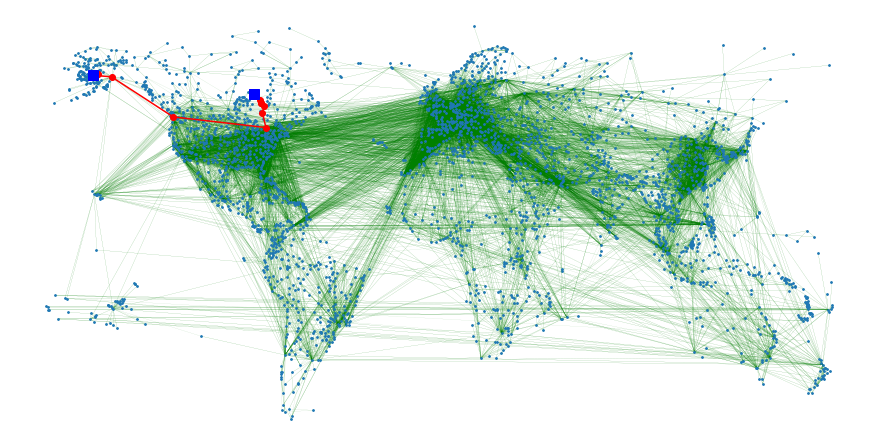

In [84]:
visualize_path(maxShortestPath)

Q4. Find average network distance among the top 100 airports by pagerank (with  alpha=0.85 )

In [67]:
pr = nx.pagerank(Flights, alpha=0.85)
prrank = np.argsort(list(pr.values()))[::-1]
prtop100 = prrank[:100]
top100Airports = [list(pr.keys())[i] for i in prtop100]

In [68]:
sumLength = 0
sumPathNum = 0

for city in top100Airports:
    pathDict = nx.single_source_shortest_path(Flights.subgraph(top100Airports), city)
    lengthDict = [len(i) for i in pathDict.values()]
    sumLength += sum(lengthDict)
    sumPathNum += len(lengthDict)

In [69]:
averNetDis = sumLength / sumPathNum
averNetDis

2.7295